#  EMF RBM Energy Densities 200 Epochs

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
import rbm_datasets

In [4]:
train_x, train_t, train_char, test_x, test_t, test_char = rbm_datasets.load_omniglot_iwae()

In [5]:
from sklearn.preprocessing import binarize
X = binarize(train_x, threshold=0.001, copy=True)

In [6]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_image(image): 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

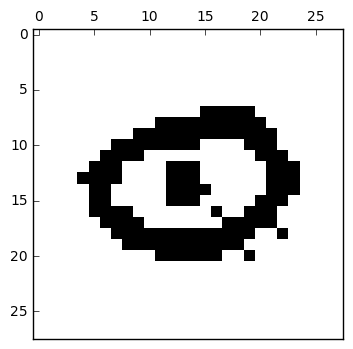

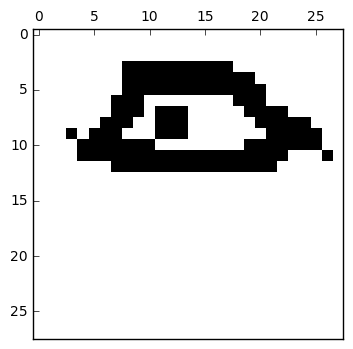

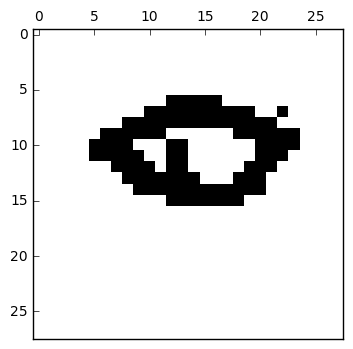

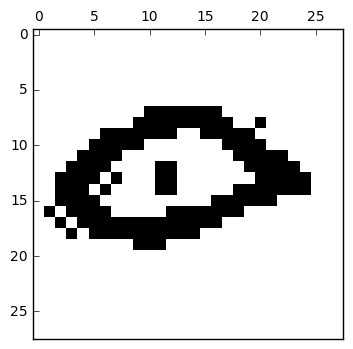

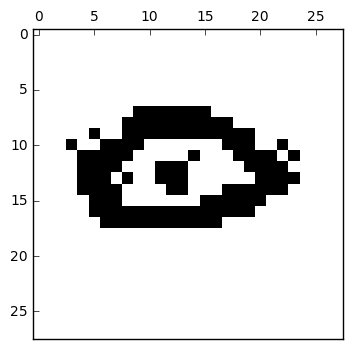

In [7]:
for i in range(5):
    show_image(X[i+100].reshape(28,28))

In [8]:
X.shape

(24345, 784)

### Helper methods for simple case

In [9]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

### Baseline

In [10]:
import emf_rbm

In [11]:
psutil.swap_memory()

sswap(total=0, used=0, free=0, percent=0.0, sin=0, sout=0)

### mean Entropy, Energy, and Free Energy

In [12]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, n_iter=200)
print rbm
rbm= rbm.fit(X)

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=True, n_components=256, n_iter=200, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x7fe4bc1aa9b0>,
    sigma=0.001, thresh=1e-08, verbose=True, weight_decay='L1')
[EMF_RBM] Iteration 1, pseudo-likelihood = -261.69, time = 10.00s
computing TAP Free Energies
monitor:  -322.233439242 425.616634838 103.391860041
[EMF_RBM] Iteration 2, pseudo-likelihood = -259.35, time = 23.59s
computing TAP Free Energies
monitor:  -320.165129554 423.70809131 103.597077606
[EMF_RBM] Iteration 3, pseudo-likelihood = -237.47, time = 23.83s
computing TAP Free Energies
monitor:  -309.238940586 399.785739346 91.2785931587
[EMF_RBM] Iteration 4, pseudo-likelihood = -222.51, time = 23.75s
computing TAP Free Energies
monitor:  -299.098274769 369.776826355 71.9665752338
[EMF_RBM] Iteration 5, pseudo-likelihood = -209.03, time = 23.77s
computing TAP Free Energies
monitor:  -294.0977835 348.588020567 56.4189010392
[EMF_RBM

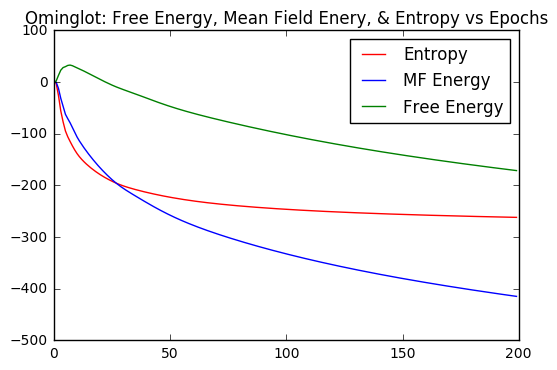

In [23]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red', label='Entropy')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue', label='MF Energy')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green', label='Free Energy')
plt.legend(loc='upper right')
plt.title("Ominglot: Free Energy, Mean Field Enery, & Entropy vs Epochs")
